# GOAL #

The goal of this project is to analyze the Google Play Store data to understand various factors that influence the ratings of mobile applications. By performing exploratory data analysis (EDA) and building a predictive model, the project aims to identify key features that contribute to higher app ratings. Ultimately, the project seeks to provide insights that can help app developers and stakeholders make informed decisions to improve the quality and performance of their applications, thereby enhancing user satisfaction and engagement on the Google Play Store platform

# SETUP # 

### Description:
This code imports necessary libraries for data analysis and machine learning tasks. It sets up the environment by importing pandas for data manipulation, numpy for numerical computations, seaborn and matplotlib for data visualization, and scikit-learn for machine learning algorithms. Additionally, it configures pandas options to display all rows and columns of a DataFrame.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score 

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

### 1. Load the data file using pandas.
### 2. Check for null values in the data. Get the number of null values for each column.
### 3. Drop records with nulls in any of the column.

In [70]:
# Load the dataset
df = pd.read_csv(r"C:\Data Analytics - Master course Simplilearn\Course 3 - Programming Basics and Data Analytics with Python\googleplaystore.csv")

In [133]:
# Display shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (10841, 13)


In [134]:
# Display summary statistics
print("Summary statistics of the dataset:")
print(df.describe())

Summary statistics of the dataset:
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


In [135]:
# Counting unique apps
number_of_unique_apps = df['App'].nunique()

# Display the number of unique apps
print("Number of unique apps:", number_of_unique_apps) 

Number of unique apps: 9660


In [136]:
# Retrieving unique app names
name_of_unique_apps = df['App'].unique()
name_of_unique_apps

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [137]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [138]:
# Check for null values
check_null = df.isnull().sum()
check_null

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [77]:
check_null = df.isnull().sum().sum()
check_null

1487

In [78]:
df1 = df.copy()

In [139]:
# Drop records with null values
df1 = df1.dropna()

In [140]:
df1.shape

(9353, 13)

## 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: <br>
a) **Size Column:**
   - Convert sizes to numeric.
   - Extract the numeric value from the column.
   - Multiply the value by 1,000 if size is mentioned in Mb.in Mb

In [81]:
#Extract the numeric value from the column
#Multiply the value by 1,000, if size is mentioned in Mb

def convert_Size(Size):
    if 'M' in Size:
        x = Size[:-1]
        x = float(x) * 1000
        return x
    elif 'k' == Size[-1]:  # Corrected comparison
        x = Size[:-1]
        x = float(x)
        return x
    else:
        return None

df1["Size"] = df1["Size"].map(convert_Size)
#df1["Size"]

In [141]:
#df1

In [83]:
df1.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [84]:
df1['Size'].ffill(inplace=True)

In [85]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [86]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

b) **Reviews Column:**
   - Convert it to numeric (int/float)

In [87]:
df1['Reviews'] = df1.Reviews.astype('int32')

In [88]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [89]:
df1.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

c) **Installs Column:**
   - Convert it to integer.
   - Remove ‘+’ and ‘,’ from the field.
   - Treat '1,000,000+' as 1,000,000.

In [147]:
df1['Installs'].value_counts()

Installs
1000000       1576
10000000      1252
100000        1150
10000         1008
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              67
1000000000      58
50              56
5                8
Name: count, dtype: int64

In [153]:
def rep(value):
    return int(str(value).replace(",", "").replace("+", ""))

df1['Installs'] = df1['Installs'].map(rep)
#df1

d) **Price Column:**
   - Remove ‘$’ sign from the field.
   - Convert it to numeric.

In [154]:
df1.Price.describe()

count    9353.000000
mean        0.961467
std        15.827539
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [93]:
df1['Price'] = df1.Price.map(lambda x : 0 if x == '0' else float(x[1:]))

In [94]:
df1.Price.describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

e) **Sanity Checks:**

1. **Average Rating:**
   - Should be between 1 and 5 as only these values are allowed on the Play Store.
   - Drop the rows that have a value outside this rangii)

2. **Reviews vs Installs:**
   - Reviews should not be more than installs as only those who installed can review the app.
   - Drop any records where reviews are greater than insiii)lls.

3. **Free Apps Price Check:**
   - For free apps (type = “Free”), the price should not be greater than 0.
   - Drop any rows where the price is greater than 0 fo free apps.

In [95]:
df1.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [96]:
df1[df1.Rating > df1.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [97]:
df1 = df1[df1.Reviews <= df1.Installs].copy()

In [98]:
df1.shape

(9353, 13)

In [99]:
df1[(df1.Type == "Free") & (df1.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 5. Performing univariate analysis:

**Boxplot for Price:**

- Are there any outliers? Think about the price of usual apps on Play Store.

**Boxplot for Reviews:**

- Are there any apps with very high number of reviews? Do the values seem right?

**Histogram for Rating:**

- How are the ratings distributed? Is it more toward higher ratings?

**Histogram for Size:**

- Note down your observations for the plots made above. Which of these seem to have outliers?

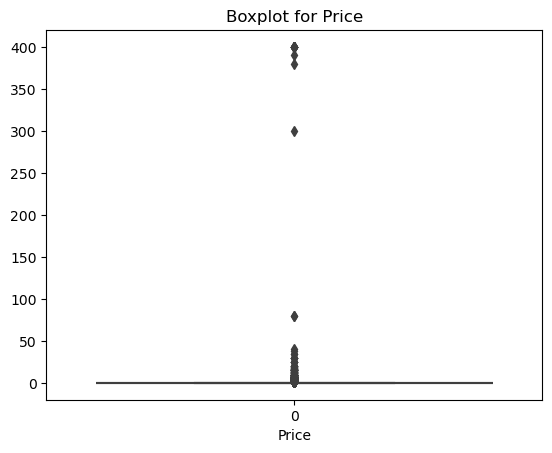

In [100]:
# Creating a boxplot for the Price column
sns.boxplot(df1['Price'])
plt.title('Boxplot for Price')
plt.xlabel('Price')
plt.show()

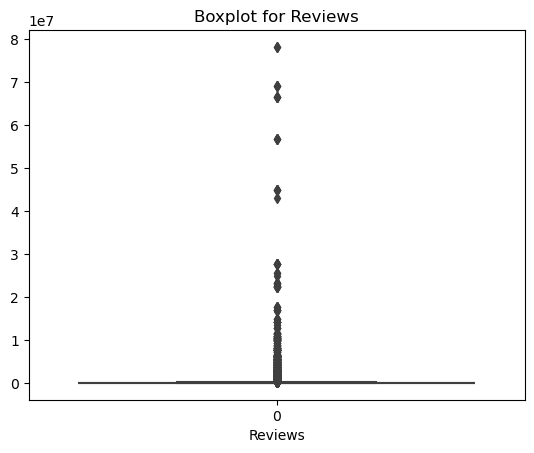

In [101]:
# Creating a boxplot for the Reviews column
sns.boxplot(df1['Reviews'])
plt.title('Boxplot for Reviews')
plt.xlabel('Reviews')
plt.show()

In [155]:
# Identifying high-review apps
Q1_reviews = df1['Reviews'].quantile(0.25)
Q3_reviews = df1['Reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews
lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

high_review_apps = df1[df1['Reviews'] > upper_bound_reviews]
#print("Apps with very high number of reviews:")
#print(high_review_apps)


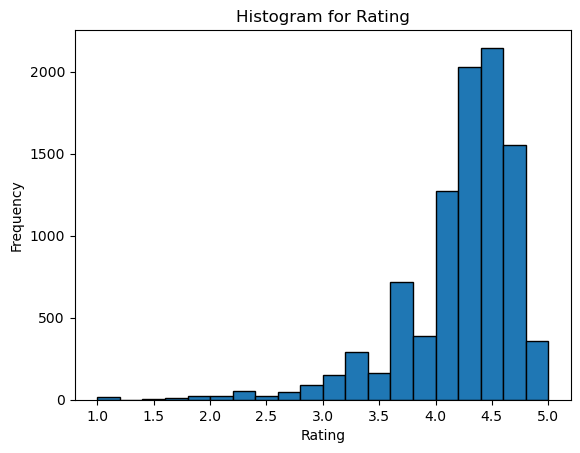

In [103]:
# Creating a histogram for the Rating column
plt.hist(df1['Rating'], bins=20, edgecolor='black')
plt.title('Histogram for Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

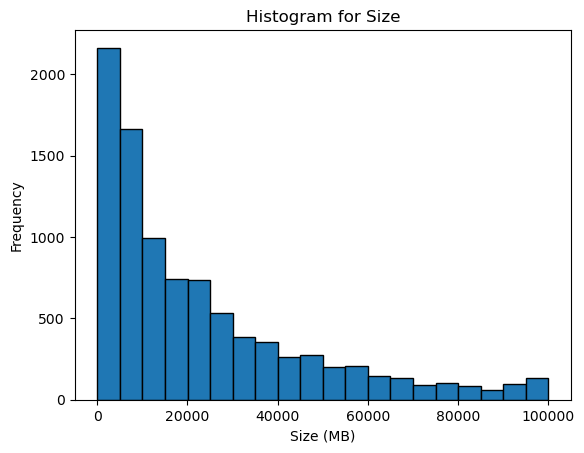

In [104]:
# Creating a histogram for the Size column
plt.hist(df1['Size'], bins=20, edgecolor='black')
plt.title('Histogram for Size')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.show()

## 6. Outlier treatment: 

**Price:** From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

- Check out the records with very high price
- Is 200 indeed a high price?
- Drop these as most seem to be junk apps

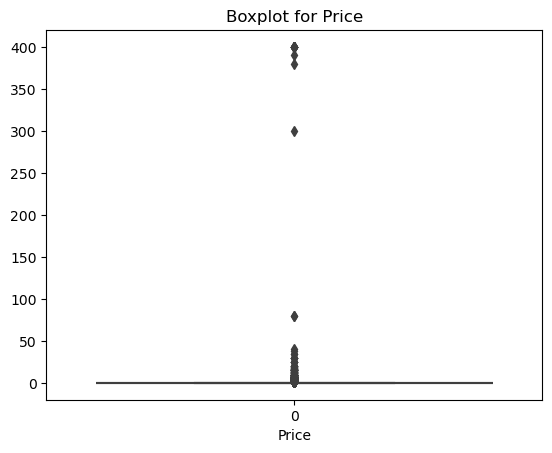

In [105]:
# Visualize the Price Data
sns.boxplot(df1['Price'])
plt.title('Boxplot for Price')
plt.xlabel('Price')
plt.show()

In [106]:
# Identify High-Price Records
high_price_threshold = 200
high_price_records = df1[df1['Price'] > high_price_threshold]
print("Records with very high price:")
print(high_price_records)


Records with very high price:
                                 App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANC

In [107]:
# Determine if $200 is High
price_stats = df1['Price'].describe()
print("Summary statistics for Price:")
print(price_stats)

Summary statistics for Price:
count    9353.000000
mean        0.961467
std        15.827539
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64


In [108]:
# Drop High-Price Records
df1_cleaned = df1[df1['Price'] <= high_price_threshold]
print("Dataframe after dropping high-price records:")
print(df1_cleaned.head())

Dataframe after dropping high-price records:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   Januar

**Reviews:** Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

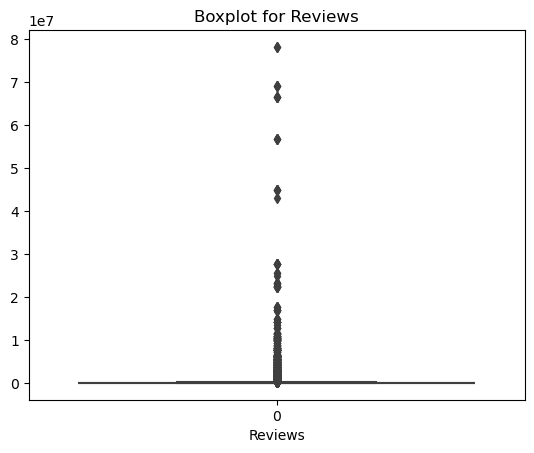

In [109]:
# Visualize the Reviews Data
sns.boxplot(df1['Reviews'])
plt.title('Boxplot for Reviews')
plt.xlabel('Reviews')
plt.show()

In [156]:
high_review_threshold = 2_000_000
high_review_records = df1[df1['Reviews'] > high_review_threshold]
#print("Records with very high number of reviews:")
#print(high_review_records)

In [111]:
# Drop High-Review Records
df1_cleaned = df1[df1['Reviews'] <= high_review_threshold]
print("Dataframe after dropping high-review records:")
print(df1_cleaned.head())

Dataframe after dropping high-review records:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   Janua

**Installs:** There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

- Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
- Decide a threshold as cutoff for outlier and drop records having values m

In [112]:
# Calculate percentiles for the Installs column
percentiles = df1['Installs'].quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])
print("Percentiles for Installs:")
print(percentiles)


Percentiles for Installs:
0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      5000000.0
0.90     10000000.0
0.95    100000000.0
0.99    500000000.0
Name: Installs, dtype: float64


In [113]:
# Decide on a threshold for outliers (using 99th percentile as an example)
threshold = percentiles[0.99]
print(f"Threshold for outliers based on 99th percentile: {threshold}")

Threshold for outliers based on 99th percentile: 500000000.0


In [114]:
# Drop records with Installs greater than the threshold
df1_cleaned = df1[df1['Installs'] <= threshold]
print("Dataframe after dropping high-install records:")
print(df1_cleaned.head())

Dataframe after dropping high-install records:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967   2800.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   Janu

### 7. Bivariate Analysis:

#### Scatter Plot/Joinplot for Rating vs. Price:
- **Pattern Observation:** 
  - Analyze the relationship between app rating and its price.
  - Check if there's any noticeable trend where higher-priced apps tend to have higher ratings.
  - Look for any outliers or clusters in the data pr ratings compared to others.

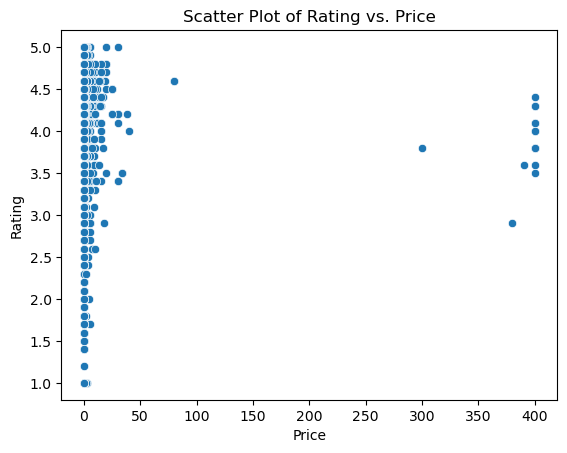

In [115]:
# Scatter plot for Rating vs. Price
sns.scatterplot(x='Price', y='Rating', data=df1)
plt.title('Scatter Plot of Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

C:\Users\harit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


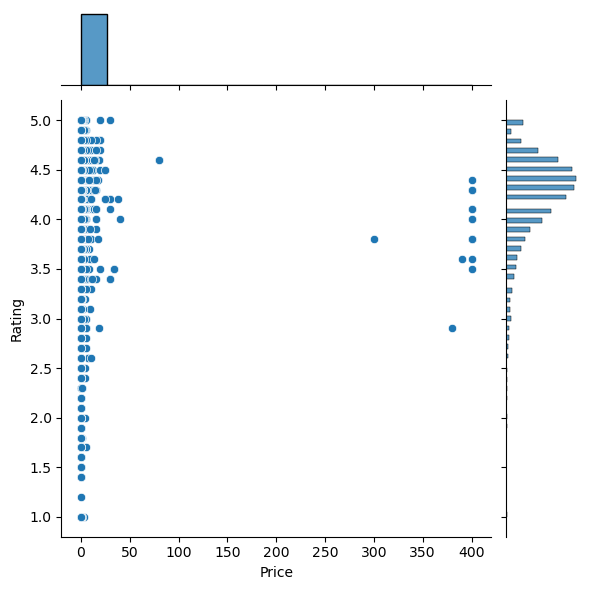

In [116]:

# Using joinplot for a more detailed analysis
sns.jointplot(x='Price', y='Rating', data=df1, kind='scatter')
plt.show()

#### Scatter Plot/Joinplot for Rating vs. Size:
- **Observation:**
  - Explore the correlation between app rating and its size.
  - Determine if there's any tendency for larger apps to receive better ratings.
  - Look for any discernible patterns or outliers in the data.

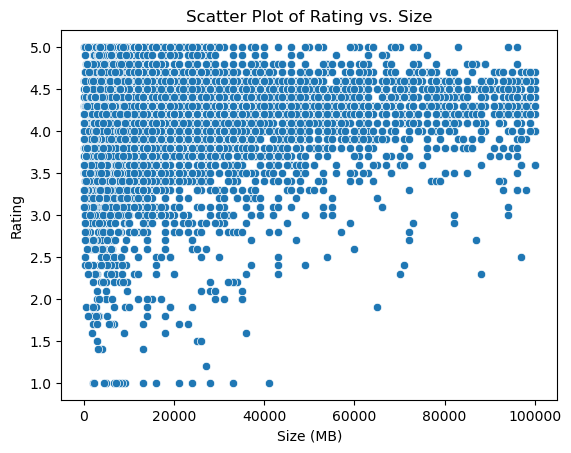

C:\Users\harit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


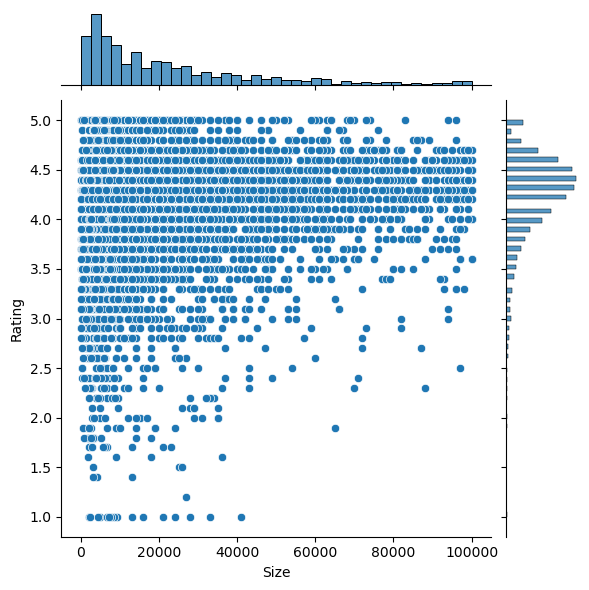

In [117]:
# Scatter plot for Rating vs. Size
sns.scatterplot(x='Size', y='Rating', data=df1)
plt.title('Scatter Plot of Rating vs. Size')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

# Using joinplot for a more detailed analysis
sns.jointplot(x='Size', y='Rating', data=df1, kind='scatter')
plt.show()

#### Scatter Plot/Joinplot for Rating vs. Reviews:
- **Observation:**
  - Investigate the association between app rating and the number of reviews.
  - Assess whether apps with more reviews consistently receive higher ratings.
  - Examine if there's a saturation point where additional reviews don't necessarily lead to higher ratings.

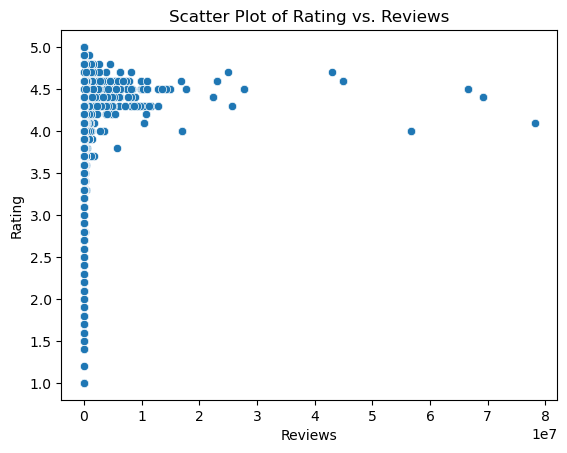

C:\Users\harit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


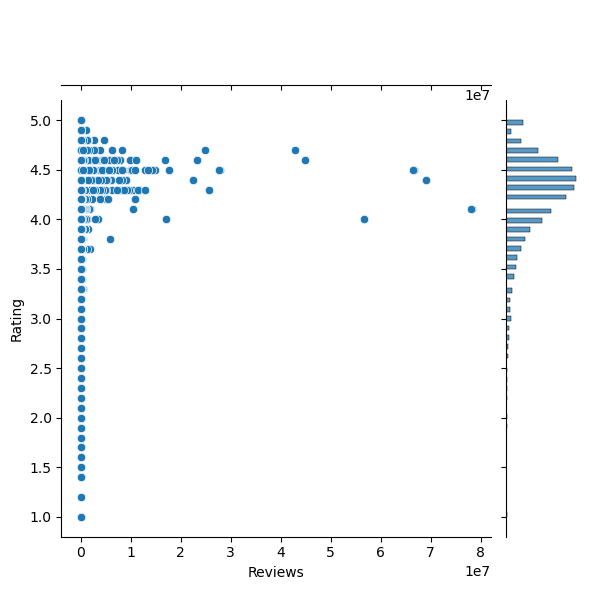

In [118]:
# Scatter plot for Rating vs. Reviews
sns.scatterplot(x='Reviews', y='Rating', data=df1)
plt.title('Scatter Plot of Rating vs. Reviews')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

# Using joinplot for a more detailed analysis
sns.jointplot(x='Reviews', y='Rating', data=df1, kind='scatter')
plt.show()

#### Boxplot for Rating vs. Content Rating:
- **Observation:**
  - Compare the distribution of ratings across different content ratings.
  - Determine if certain content ratings tend to receive higher or lower ratings compared to others.
  - Identify any significant differences or outliers in the ratings distribution for each content rating category.

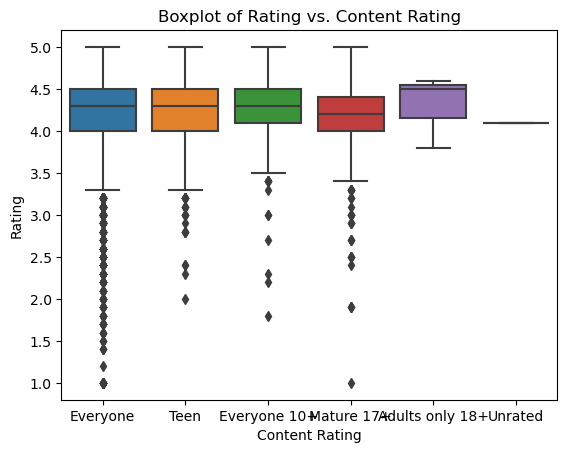

In [119]:
# Boxplot for Rating vs. Content Rating
sns.boxplot(x='Content Rating', y='Rating', data=df1)
plt.title('Boxplot of Rating vs. Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.show()

#### Boxplot for Ratings vs. Category:
- **Observation:**
  - Explore the relationship between app ratings and their respective categories.
  - Identify which app categories tend to have higher average ratings.
  - Determine if there are any categories where apps consistently receive lower ratings compared to others.

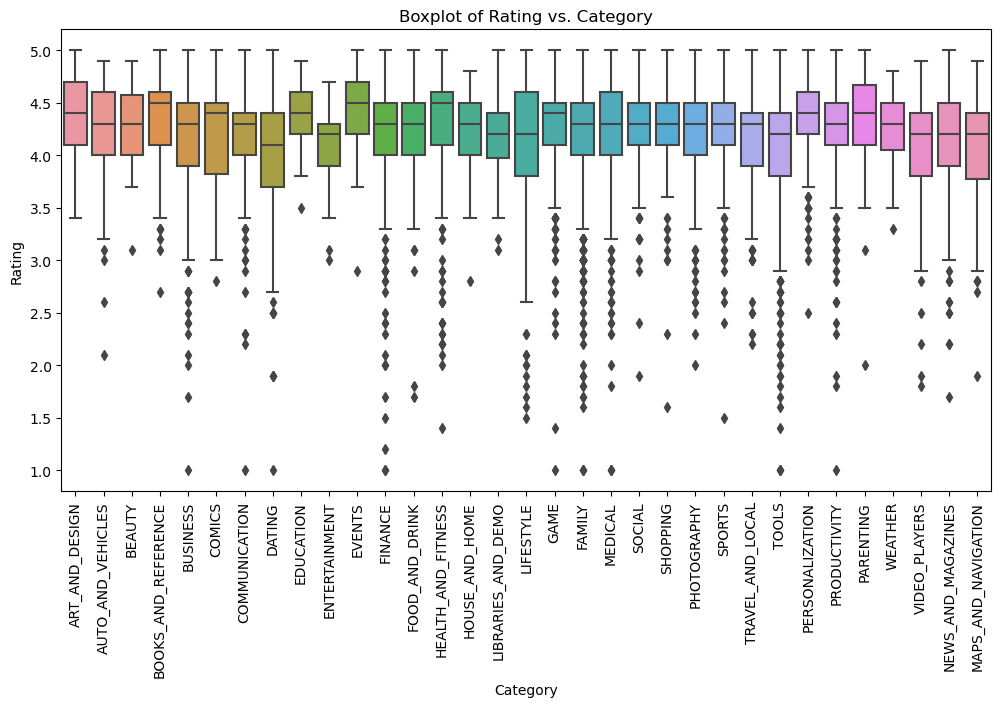

In [120]:
# Boxplot for Rating vs. Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=df1)
plt.xticks(rotation=90)
plt.title('Boxplot of Rating vs. Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

### 8. Data Preprocessing:

1. **Copy DataFrame:**
   - Create a copy of the original DataFrame and name it `inp1`.

2. **Reduce Skewness in Reviews and Installs:**
   - Apply log transformation (`np.log1p`) to the `Reviews` and `Installs` columns to reduce skewness.

3. **Drop Columns:**
   - Drop the following columns as they are not useful for our task:
     - `App`
     - `Last Updated`
     - `Current Ver`
     - `Android Ver`

4. **Dummy Encoding:**
   - Get dummy columns for the categorical variables:
     - `Category
     - `Content Rating`
   - Dummy encoding converts character fields to numeric, making them suitable for model training.
   - Name the new DataFrame `inp2`.`Genres`

In [121]:
# Create a copy of the dataframe
inp1 = df1.copy()

In [122]:
# Apply log transformation to Reviews and Installs
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])

In [123]:
# Drop unnecessary columns
inp1.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'], inplace=True)


In [124]:
# Get dummy columns for Category, Genres, and Content Rating
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'], drop_first=True)

In [158]:
#print(inp2.head())

### 9. Train-Test Split:
. **Apply 70-30 Split:**
   - Split the dataset into training and testing sets using a 70-30 split.
   - Name the new DataFrames as follows:
     - Training set: `df_train`
     - Testing set: `df_test`

In [126]:
# Split the data into training and testing sets
df1_train, df1_test = train_test_split(inp2, test_size=0.70, random_state=100)

# Display the size of the training and testing sets
print("Training set size:", df1_train.shape)
print("Testing set size:", df1_test.shape)

Training set size: (2805, 157)
Testing set size: (6548, 157)


### 10. Separate Dataframes:

 **Separate into X_train, y_train, X_test, and y_test:**
   - Split the training and testing sets into features (X) and target variable (y).
   - Assign the following variables:
     - `X_train`: Features of the training set
     - `y_train`: Target variable of the training set
     - `X_test`: Features of the testing set
     - `y_test`: Target variable of the testing set

In [127]:
# Separate the dataframes into X_train, y_train, X_test, and y_test
y_train = df1_train['Rating']
y_test = df1_test['Rating']

X_train = df1_train.drop(columns=['Rating'])
X_test = df1_test.drop(columns=['Rating'])

In [128]:
X_test.head()
y_test.head()

356     4.4
164     4.1
5662    2.7
2674    4.7
3414    4.2
Name: Rating, dtype: float64

### 11. Model Building:

1. **Linear Regression:**
   - Use linear regression as the modeling technique to predict the app rating.
   - Fit the linear regression model on the training data.

2. **Report R2 on the Train Set:**
   - Calculate the R-squared (R2) score on the train set to evaluate the performance of the linear regression model.
   - R2 score measures the proportion of the variance in the target variable (rating) that is predictable from the features.

3. **Results:**
   - Report the R2 score on thetrain set.
   - Report the R2 score on the train set.

In [129]:
# One-hot encode non-numeric columns
df1_train = pd.get_dummies(df1_train, columns=['Type'], drop_first=True)
df1_test = pd.get_dummies(df1_test, columns=['Type'], drop_first=True)

# Re-assign X_train, X_test after one-hot encoding
X_train = df1_train.drop(columns=['Rating'])
X_test = df1_test.drop(columns=['Rating'])

# Rebuild the Linear Regression model
model = LinearRegression()

# Train the model on the updated training data
model.fit(X_train, y_train)


LinearRegression()

In [130]:
# Calculate R2 score on the train set
train_r2 = model.score(X_train, y_train)
print("R2 score on the train set:", train_r2)

R2 score on the train set: 0.19456512690272865


### 12. Predictions on Test Set and Reporting R2:

1. **Make Predictions:**
   - Use the trained linear regression model to make predictions on the test set (`X_test`).
   - Predict the app ratings based on the features in the test set.

2. **Evaluate R2 on Test Set:**
   - Calculate the R-squared (R2) score on the test set to assess the performance of the model on unseen data.
   - R2 score measures the proportion of the variance in the target variable (rating) that is predictable from the features.

3. **Results:**
   - Report the R2 score on the test set to understand how well the model generalizes to new, unseen data.

In [131]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [132]:
# Calculate R2 score on the test set
test_r2 = r2_score(y_test, y_pred)
print("R2 score on the test set:", test_r2)

R2 score on the test set: 0.13462529283624614


# CONCLUSION #

This project aimed to predict the rating of mobile apps on the Google Play Store. After preprocessing the data and training a linear regression model, we achieved an \( R^2 \) score of approximately 0.195 on the training set and 0.135 on the test set.

While the model performed reasonably well on the training set, it showed a lower performance on the test set, indicating potential overfitting. Further analysis and fine-tuning of the model may be required to improve its generalization ability.

In conclusion, this project provides insights into the process of building a predictive model for app rating prediction and highlights areas for further improvement.